# PGA Tour Web Scraping and Machine Learning Project

AS an avid golf fan and asipring data scientist, I've always wanted to gather data from PGA Tour.com and do my own analysis on tour pro statistics. The following notebook walks you through my steps to collect, pre-process and clean, visualize and create a model to predict winners on the PGA tour for the 2017 season. The data were collected from <a href='https://www.pgatour.com/'>pgatour.com</a>

# <a id='TOC'>Table of Contents</a>
<ol>
<li><a href='#section 1'>Imports</a></li>
<li><a href='#section_2'>Data Collection</a></li>
<li><a href='#section_3'>Data Cleaning and Pre-Processing</a></li>
<li><a href='#section_4'>Exploratory Data Analysis</a></li>
<li><a href='#section_5'>Train, fit, and test machine learning model</a></li>
<li><a href='#section_6'>Interpret Results</a></li>



</ol>

# <a href='#section 1'>1. Imports</a>

The three imports I used for this notebook were requests, pandas, and beautiful soup.

In [2]:
#Imports
import requests
import pandas as pd
from bs4 import BeautifulSoup

# <a id='section_2'>2. Data Collection</a>
<a href='#TOC'>Back to table of Contents</a>

In order to collect the data I needed to perform the analysis, I had to utilize the beautiful soup package to web scrape the pgatour.com website. If you look at the <a href="https://www.pgatour.com/stats.html">PGA tour stats page</a>, you'll notice the statistics are contained in different pages. For example, putting, driving and scoring statistics are all contained in different pages. Because this is my first end to end project, I wanted to keep my final model simple so only pulled Fedex cup points, top 10's, # of wins, scoring average, driving distance, driving accuracy and greens in regulation %. In order to get the data from PGAtour.com I took the following steps.

For each page:
<ol>
<li>Have a function that pulls column headers</li>
<li>Have a function that pulls players from particular stats page</li>
<li>Have a function that pulls statistics from page</li>
<li>Create a dictionary to store player data in for particular stats page.</li>
<li>Have function that uses functions 1-4 to create a pandas dataframe to store data for that particular statistic.</li>
<li>Use URL and number of columns for each stats page to create dataframes.</li>
</ol>


### 1. Pull column headers from page

In [3]:
def get_headers(soup):
    '''This function get's the column names to use for the data frame.'''
    headers = []
    
    #Get rounds header
    rounds = soup.find_all(class_="rounds hidden-small hidden-medium")[0].get_text()
    headers.append(rounds)
    
    #Get other headers
    stat_headers = soup.find_all(class_="col-stat hidden-small hidden-medium")
    for header in stat_headers:
        headers.append(header.get_text())
    
    return headers

### 2. Pull players from page

In [4]:
#Get Players
def get_players(soup):
    '''This function takes the beautiful soup created and uses it to gather player names from the specified stats page.'''
    
    player_list = []
    
    #Get player as html tags
    players = soup.select('td a')[1:] #Use 1 beacuse first line of all tables is not useful.
    #Loop through list
    for player in players:
        player_list.append(player.get_text())
    
    return player_list

### 3. Pull statistics from page

In [5]:
##Get Stats
def get_stats(soup, categories):
    '''This function takes the soup created before and the number of categories needed to generate this'''
    
    #Finds all tags with class specified and puts into a list
    stats = soup.find_all(class_="hidden-small hidden-medium")
    
    #Initialize stats list
    stat_list = []
    
    #Loop through 
    for i in range(0, len(stats)-categories+1, categories):
        temp_list = []
        for j in range(categories):
            temp_list.append(stats[i + j].get_text())
        stat_list.append(temp_list)
            
    return stat_list

### 4. Create data dictionary for page

In [6]:
def stats_dict(players, stats):
        '''This function takes two lists, players and stats, 
        and creates a dictionary with the player being the key 
        and the stats as the vales (as a list)'''
    
        #initialize player dictionary
        player_dict = {}
    
        #Loop through player list
        for i, player in enumerate(players):
            player_dict[player] = stats[i]
    
        return player_dict

### 5. Use functions 1-4 to create dataframe for statistic. "make_dataframe"

In [7]:
##Mega function
def make_dataframe(url, categories):
        
    ##Create soup object from url.
    response = requests.get(url)
    text = response.text
    soup = BeautifulSoup(text, 'lxml')
    
    #1. Get Headers
    headers = get_headers(soup)
    
    #2. Get Players
    players = get_players(soup)
    
    #3. Get Stats
    stats = get_stats(soup, categories)
    
    #4. Make stats dictionary.
    stats_dictionary = stats_dict(players, stats)
    
    #Make dataframe
    frame = pd.DataFrame(stats_dictionary, index = headers).T
    
    #Reset index
    frame = frame.reset_index()
    
    #For each Dataframe, change index column to 'NAME'
    frame = frame.rename(index = str, columns = {'index': 'NAME'})
    return frame
  

### 6. In order to get the statistics for each page, I used the URL for each page and the number of columns for each data table to create the dataframes below

In [8]:
#Fedex cup points
fcp_2017 = make_dataframe("https://www.pgatour.com/stats/stat.02671.2017.html", 6)

#Top 10's and wins
top10_2017 = make_dataframe("https://www.pgatour.com/stats/stat.138.2017.html", 5)

#Scoring statistics
scoring_2017 = make_dataframe("https://www.pgatour.com/stats/stat.120.2017.html", 5)

#Driving Distance
drivedistance_2017 = make_dataframe("https://www.pgatour.com/stats/stat.101.2017.html", 4)

#Driving Accuracy
driveacc_2017 = make_dataframe("https://www.pgatour.com/stats/stat.102.2017.html", 4)
#Change column name from % to FWY %
driveacc_2017 = driveacc_2017.rename(columns = {'%': "FWY %"})

#Greens in Regulation.
gir_2017 = make_dataframe("https://www.pgatour.com/stats/stat.103.2017.html", 5)
#Change column name from % to GIR %
gir_2017 = gir_2017.rename(columns = {'%': "GIR %"})

sg_putting_2017 = make_dataframe("https://www.pgatour.com/stats/stat.02564.2017.html", 4)




In [9]:
sg_putting_2017 = sg_putting_2017.rename(columns = {'AVERAGE': 'AVG STROKES GAINED PUTTING'})

In [10]:
#Assert all dataframes have loaded.
assert len(fcp_2017)>50
assert len(top10_2017)>50
assert len(scoring_2017)>50
assert len(drivedistance_2017)>50
assert len(driveacc_2017)>50
assert len(gir_2017)>50

# <a id='section_3'>3. Data Cleaning and Pre-Processing</a>
<a href='#TOC'>Back to table of Contents</a>

Data preprocessing tasks:
<ol>
<li>Combine dataframes into list.</li>
<li>Merge list of dataframes together on name column.</li>
<li>Select data categories: Name, Fedex cup points, Rounds, # of wins, # of top 10's, Scoring Avg, Avg. Driving Distance, Fairway %, GIR%</li>
<li>Rename columns and do some cleaning.</li>
<li>Have function that uses functions 1-4 to create a pandas dataframe to store data for that particular statistic.</li>
<li>Use URL and number of columns for each stats page to create dataframes.</li>
</ol>



Combine dataframes into list

In [11]:
#Get Dataframes into list.
dfs = [fcp_2017, top10_2017, scoring_2017, drivedistance_2017, driveacc_2017, gir_2017, sg_putting_2017]

Merge list of dataframes together. Notice that every column from tables were merged, only want to keep some.

In [12]:
#Data Wrangling and Clensing
from functools import reduce

#Combine all dataframes in list df
dffinal = reduce(lambda left, right: pd.merge(left, right, on='NAME'), dfs)
dffinal.head()

,NAME,EVENTS_x,POINTS,# OF WINS,# OF TOP 10'S,POINTS BEHIND LEAD,RESET POINTS,EVENTS_y,TOP 10,1ST,...,POSSIBLE FAIRWAYS,ROUNDS_y,GIR %,GREENS HIT,# HOLES,RELATIVE/PAR,ROUNDS,AVG STROKES GAINED PUTTING,TOTAL SG:PUTTING,MEASURED ROUNDS
0,Aaron Baddeley,20,325,,2,"5,956",,20,2,,...,800,61,62.57,642,"1,026",-0.28,61,.044,2.004,46
1,Adam Hadwin,28,362,1,5,"2,638",206,28,5,1,...,"1,367",98,65.08,"1,148","1,764",-0.28,98,.446,35.245,79
2,Adam Scott,16,642,,4,"5,639",,16,4,,...,812,58,67.05,700,"1,044",-0.27,58,.054,2.249,42
3,Alex Cejka,28,276,,1,"6,005",,28,1,,...,"1,073",85,66.45,921,"1,386",-0.22,85,-.359,-22.281,62
4,Andres Gonzales,24,226,,1,"6,055",,24,1,,...,965,73,67.71,841,"1,242",-0.26,73,.023,1.324,57


Select data categories. notice multiple Rounds_x columns. will deal with later

In [13]:
#Select desired features
df_2017 = dffinal[['NAME', 'POINTS', 'ROUNDS_x', '# OF WINS', "# OF TOP 10'S", 'AVG', 'AVG.', 'FWY %', 'GIR %', 'AVG STROKES GAINED PUTTING']]
df_2017.head()

,NAME,POINTS,ROUNDS_x,ROUNDS_x,# OF WINS,# OF TOP 10'S,AVG,AVG.,FWY %,GIR %,AVG STROKES GAINED PUTTING
0,Aaron Baddeley,325,61,61,,2,71.483,292.6,52.25,62.57,.044
1,Adam Hadwin,362,98,98,1,5,70.583,291.3,63.20,65.08,.446
2,Adam Scott,642,58,58,,4,69.996,307.0,56.65,67.05,.054
3,Alex Cejka,276,85,85,,1,71.461,282.1,67.19,66.45,-.359
4,Andres Gonzales,226,73,73,,1,71.112,299.2,55.75,67.71,.023


Column renaming, data cleaning

In [14]:
#Rename Columns
df_2017 = df_2017.rename(columns = {'AVG.':'DRIVING AVG.', 'ROUNDS_x': 'ROUNDS'})

#Get rid of comma in points column
df_2017['POINTS'] = df_2017['POINTS'].apply(lambda x: x.replace(',', ''))

#Remove duplicat rounds columns
df_2017 = df_2017.T.drop_duplicates().T

df_2017.head()


,NAME,POINTS,ROUNDS,# OF WINS,# OF TOP 10'S,AVG,DRIVING AVG.,FWY %,GIR %,AVG STROKES GAINED PUTTING
0,Aaron Baddeley,325,61,,2,71.483,292.6,52.25,62.57,.044
1,Adam Hadwin,362,98,1,5,70.583,291.3,63.20,65.08,.446
2,Adam Scott,642,58,,4,69.996,307.0,56.65,67.05,.054
3,Alex Cejka,276,85,,1,71.461,282.1,67.19,66.45,-.359
4,Andres Gonzales,226,73,,1,71.112,299.2,55.75,67.71,.023


In [15]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 10 columns):
NAME                          160 non-null object
POINTS                        160 non-null object
ROUNDS                        160 non-null object
# OF WINS                     160 non-null object
# OF TOP 10'S                 160 non-null object
AVG                           160 non-null object
DRIVING AVG.                  160 non-null object
FWY %                         160 non-null object
GIR %                         160 non-null object
AVG STROKES GAINED PUTTING    160 non-null object
dtypes: object(10)
memory usage: 18.8+ KB


Turn all numeric columns to numerics

In [16]:
#Turn columns to numeric
df_2017[['POINTS', '# OF WINS', 'ROUNDS', "# OF TOP 10'S", 'AVG', 'DRIVING AVG.',
       'FWY %', 'GIR %', 'AVG STROKES GAINED PUTTING']] = df_2017[['POINTS', '# OF WINS', 'ROUNDS', "# OF TOP 10'S", 'AVG', 'DRIVING AVG.',
       'FWY %', 'GIR %', 'AVG STROKES GAINED PUTTING']].apply(pd.to_numeric)

df_2017.head()

,NAME,POINTS,ROUNDS,# OF WINS,# OF TOP 10'S,AVG,DRIVING AVG.,FWY %,GIR %,AVG STROKES GAINED PUTTING
0,Aaron Baddeley,325,61,NaN,2,71.483,292.6,52.25,62.57,0.044
1,Adam Hadwin,362,98,1.0,5,70.583,291.3,63.20,65.08,0.446
2,Adam Scott,642,58,NaN,4,69.996,307.0,56.65,67.05,0.054
3,Alex Cejka,276,85,NaN,1,71.461,282.1,67.19,66.45,-0.359
4,Andres Gonzales,226,73,NaN,1,71.112,299.2,55.75,67.71,0.023


In [17]:
print(df_2017.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 10 columns):
NAME                          160 non-null object
POINTS                        160 non-null int64
ROUNDS                        160 non-null int64
# OF WINS                     34 non-null float64
# OF TOP 10'S                 160 non-null int64
AVG                           160 non-null float64
DRIVING AVG.                  160 non-null float64
FWY %                         160 non-null float64
GIR %                         160 non-null float64
AVG STROKES GAINED PUTTING    160 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 18.8+ KB
None


Lastly, the # of wins columns has NaN values for players with zero wins. Want to convert these NaN's to 0's.

In [18]:
df_2017.fillna(0, inplace=True)

In [19]:
df_2017.head(5)

,NAME,POINTS,ROUNDS,# OF WINS,# OF TOP 10'S,AVG,DRIVING AVG.,FWY %,GIR %,AVG STROKES GAINED PUTTING
0,Aaron Baddeley,325,61,0.0,2,71.483,292.6,52.25,62.57,0.044
1,Adam Hadwin,362,98,1.0,5,70.583,291.3,63.20,65.08,0.446
2,Adam Scott,642,58,0.0,4,69.996,307.0,56.65,67.05,0.054
3,Alex Cejka,276,85,0.0,1,71.461,282.1,67.19,66.45,-0.359
4,Andres Gonzales,226,73,0.0,1,71.112,299.2,55.75,67.71,0.023


Lastly, I wanted to add a couple binary columns. One indicating if a player has won a tournament that year, and the other indicating if the player has an average driving distance of over 300 yards.

In [20]:
#Add driving 300+ column
#Add column if tournament winner
df_2017['300+'] = df_2017['DRIVING AVG.'].apply(lambda x: 1 if x>=300 else 0)
df_2017['Winner'] = df_2017['# OF WINS'].apply(lambda x: 1 if x >= 1 else 0)

In [21]:
df_2017.head()

,NAME,POINTS,ROUNDS,# OF WINS,# OF TOP 10'S,AVG,DRIVING AVG.,FWY %,GIR %,AVG STROKES GAINED PUTTING,300+,Winner
0,Aaron Baddeley,325,61,0.0,2,71.483,292.6,52.25,62.57,0.044,0,0
1,Adam Hadwin,362,98,1.0,5,70.583,291.3,63.20,65.08,0.446,0,1
2,Adam Scott,642,58,0.0,4,69.996,307.0,56.65,67.05,0.054,1,0
3,Alex Cejka,276,85,0.0,1,71.461,282.1,67.19,66.45,-0.359,0,0
4,Andres Gonzales,226,73,0.0,1,71.112,299.2,55.75,67.71,0.023,0,0


# 4. <a id='section_4'>Exploratory Data Analysis</a>
<a href='#TOC'>Back to table of Contents</a>


First, I'll take a look at the .info(), .describe(), and head methods to get a feel for the dataset.

In [22]:
df_2017.head()

,NAME,POINTS,ROUNDS,# OF WINS,# OF TOP 10'S,AVG,DRIVING AVG.,FWY %,GIR %,AVG STROKES GAINED PUTTING,300+,Winner
0,Aaron Baddeley,325,61,0.0,2,71.483,292.6,52.25,62.57,0.044,0,0
1,Adam Hadwin,362,98,1.0,5,70.583,291.3,63.20,65.08,0.446,0,1
2,Adam Scott,642,58,0.0,4,69.996,307.0,56.65,67.05,0.054,1,0
3,Alex Cejka,276,85,0.0,1,71.461,282.1,67.19,66.45,-0.359,0,0
4,Andres Gonzales,226,73,0.0,1,71.112,299.2,55.75,67.71,0.023,0,0


In [23]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 12 columns):
NAME                          160 non-null object
POINTS                        160 non-null int64
ROUNDS                        160 non-null int64
# OF WINS                     160 non-null float64
# OF TOP 10'S                 160 non-null int64
AVG                           160 non-null float64
DRIVING AVG.                  160 non-null float64
FWY %                         160 non-null float64
GIR %                         160 non-null float64
AVG STROKES GAINED PUTTING    160 non-null float64
300+                          160 non-null int64
Winner                        160 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 21.2+ KB


Observations: 160 total rows, no missing data, 9 columns are numeric and the Name column is text.

In [24]:
df_2017.describe()

,POINTS,ROUNDS,# OF WINS,# OF TOP 10'S,AVG,DRIVING AVG.,FWY %,GIR %,AVG STROKES GAINED PUTTING,300+,Winner
count,160.00000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,649.57500,81.881250,0.29375,3.212500,70.772094,294.147500,60.610938,65.810125,0.040881,0.256250,0.212500
std,423.79753,14.799019,0.71460,2.332131,0.620405,8.968933,5.031006,2.333066,0.307692,0.437932,0.410361
min,98.00000,50.000000,0.00000,1.000000,68.846000,271.400000,45.930000,59.630000,-1.066000,0.000000,0.000000
25%,360.50000,71.000000,0.00000,1.000000,70.397500,288.075000,57.037500,63.997500,-0.141500,0.000000,0.000000
50%,542.50000,84.000000,0.00000,3.000000,70.866000,293.950000,60.085000,66.080000,0.032500,0.000000,0.000000
75%,897.50000,93.000000,0.00000,4.000000,71.163250,300.150000,63.970000,67.265000,0.274500,1.000000,0.000000
max,3000.00000,112.000000,5.00000,12.000000,72.803000,317.200000,72.730000,70.640000,0.840000,1.000000,1.000000


Observations: 
<ul>
<li>Most wins by one player in 2017 was 5</li>
<li>Avg driving distance among all players was 294 yards</li>
<li>Scoring average was 70.77</li>
</ul>

##### Let's see if we can uncover any relationships in the data with some visualizations

In [25]:
#Import plotting libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

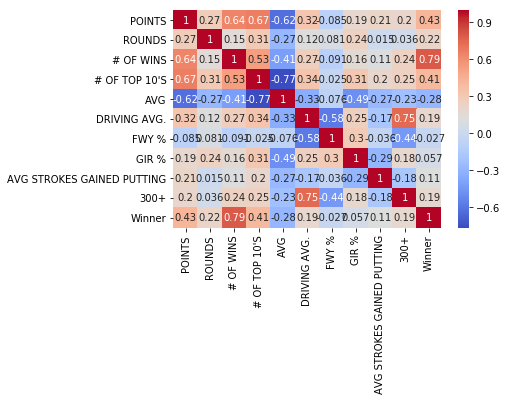

In [26]:
sns.heatmap(df_2017.corr(),cmap='coolwarm',annot=True)

Observations: 
<ul>
<li>Scoring Avg and # of top 10's are highly negatively correlated with each other</li>
<li>Avg. Driving Distance and FWY% are highly negatively correlate</li>
<li>Scoring average was 70.77</li>
</ul>


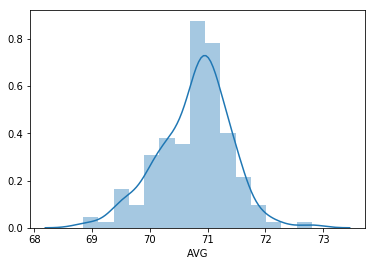

In [27]:
sns.distplot(df_2017['AVG'])

Scored look approximately normally distributed, maybe one outlier on the higer end.

[(60, 75),
 Text(0,0.5,'Scoring Average'),
 Text(0.5,1,"# of top 10's vs scoring average")]

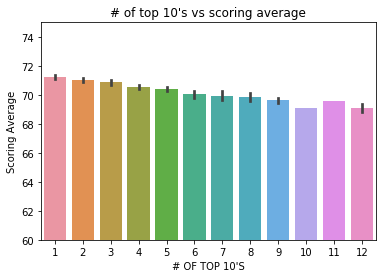

In [28]:
bp = sns.barplot(x="# OF TOP 10'S",y='AVG', data = df_2017)
bp.set(ylim=(60, 75), title="# of top 10's vs scoring average", ylabel="Scoring Average")

We can now see this correlation between top 10's and scoring average graphically.

[Text(0,0.5,'Fedex Cup Points'),
 Text(0.5,1,"# of top 10's vs Fedex Cup Points")]

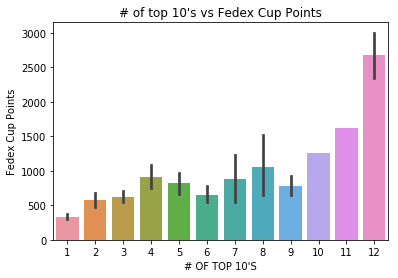

In [29]:
bp = sns.barplot(x="# OF TOP 10'S",y='POINTS', data = df_2017)
bp.set(title="# of top 10's vs Fedex Cup Points", ylabel="Fedex Cup Points")

Here's a different look at fedex cup points vs # of top 10's.

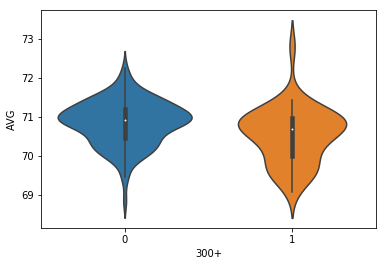

In [30]:
sns.violinplot(x = '300+', y = 'AVG', data = df_2017)

In [31]:
df_2017.groupby('300+').mean()[['AVG']].reset_index()

,300+,AVG
0,0,70.854521
1,1,70.532854


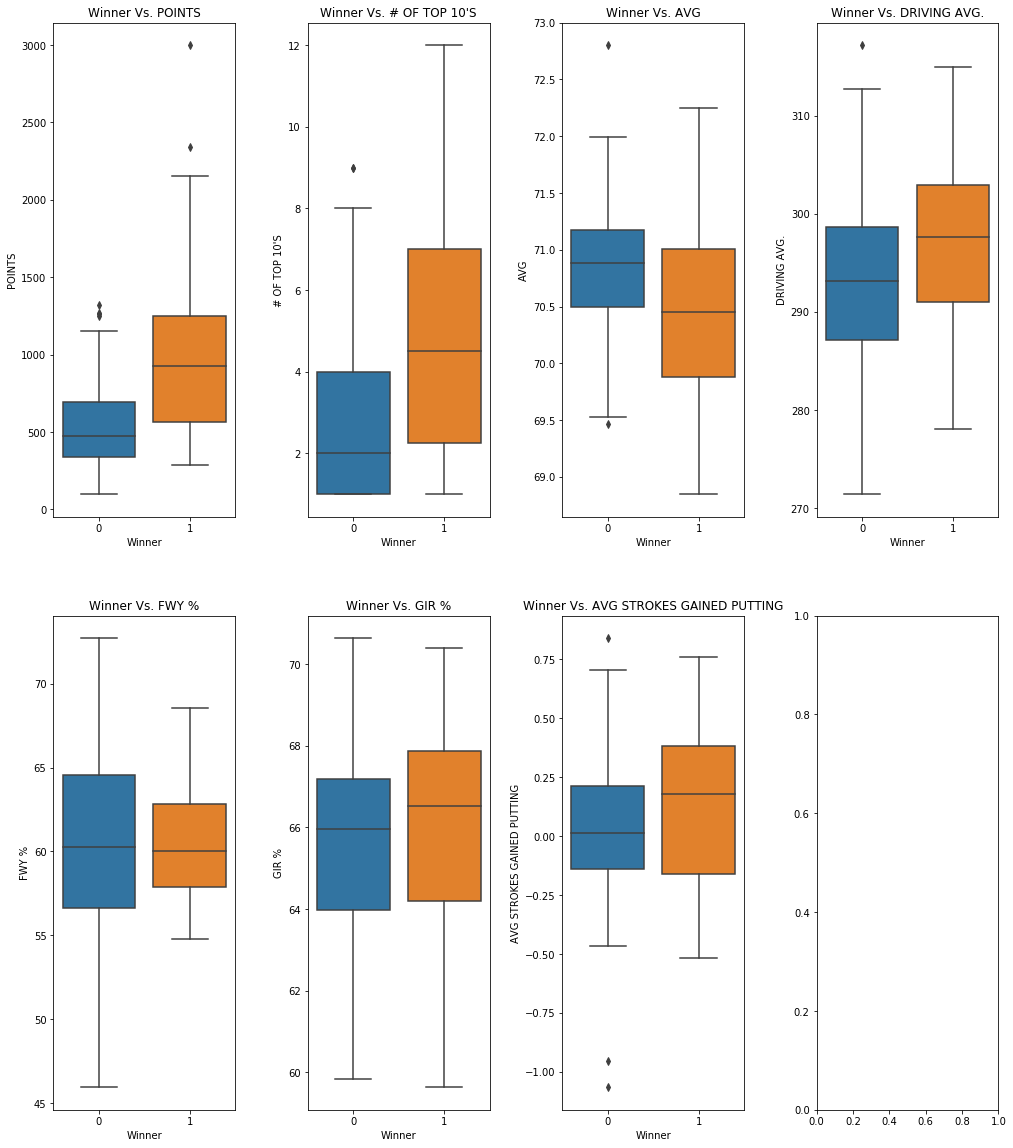

In [32]:
f, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15,20))
columns = ['POINTS', "# OF TOP 10'S", 'AVG', 'DRIVING AVG.', 'FWY %', 'GIR %', 'AVG STROKES GAINED PUTTING']
row = 0
col = 0
for i, column in enumerate(columns):
    g = sns.boxplot(x='Winner', y=column, ax=ax[row][col], data=df_2017)
    g.set(title = "Winner Vs. " + column)
    col += 1
    if col == 4:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=.4, hspace=None)


# 5. <a id='section_5'>Train, fit, and test machine learning model</a>
<a href='#TOC'>Back to table of Contents</a>

In order to predict winners from the 2017 season, I'm going to use a logistic regression model. The steps I will take to build this model are listed below.
<ol>
<li>Import machine learning modules</li>
<li>Select features to run model on</li>
<li>Separate data into training and testing sets</li>
<li>Build model and create predictions</li>
</ol>


### Import machine learning modules

In [33]:
from sklearn.model_selection import train_test_split #Train test splits
from sklearn.linear_model import LogisticRegression #Logistic regression
from sklearn.metrics import classification_report #Classification report metrics
from sklearn.metrics import confusion_matrix #Confusion matrix

### Select features to run model on

I'd like to run this model on all of the numerical columns except for # of wins. I'm leaving out # of wins because that inherently will predict a winner perfectly because if they do have any wins on the year, the model will predict them as a winner. 

In [34]:
print(df_2017.columns)

Index(['NAME', 'POINTS', 'ROUNDS', '# OF WINS', '# OF TOP 10'S', 'AVG',
       'DRIVING AVG.', 'FWY %', 'GIR %', 'AVG STROKES GAINED PUTTING', '300+',
       'Winner'],
      dtype='object')


In [74]:
X = df_2017[['POINTS', 'ROUNDS', "# OF TOP 10'S", 'AVG',
       'DRIVING AVG.', 'FWY %', 'GIR %', 'AVG STROKES GAINED PUTTING', '300+']]
y = df_2017['Winner']

### Separate data into Training and Testing data sets

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Build model and create predictions

In [76]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
predictions = logmodel.predict(X_test)

In [78]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
cf_dat = confusion_matrix(y_test, predictions)

In [80]:
confusion = pd.DataFrame(data = cf_dat)

In [81]:
confusion

,0,1
0,54,1
1,7,2


For the confusion matrix above, the columns represent what the model predicts and the rows represent the true classification. Based on this confusion matrix, the model predicts true non winners correctly (54)/(54+1) = 98% of the time while it predicts winners 2/(2+7) = 22% of the time.  

In [82]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.89      0.98      0.93        55
          1       0.67      0.22      0.33         9

avg / total       0.85      0.88      0.85        64



# Conclusion

Based on these results, the logistic regression model does not appear to be performing well for predicting tournament winners. I believe next steps to improving model quality would be to gather more features to run the model on, use a variable selection method to select important features (such as PCA, or lasso/ridge/elastic net) and run a model on the most important features. Additionally I would use cross validation in order to reduce the chance that the results we are seeing are due to overfitting from noise in the data. 